# Simple Linear Regression

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import and check your dataset
df = pd.read_csv('./Advertising Budget and Sales.csv')
df.head(n=10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

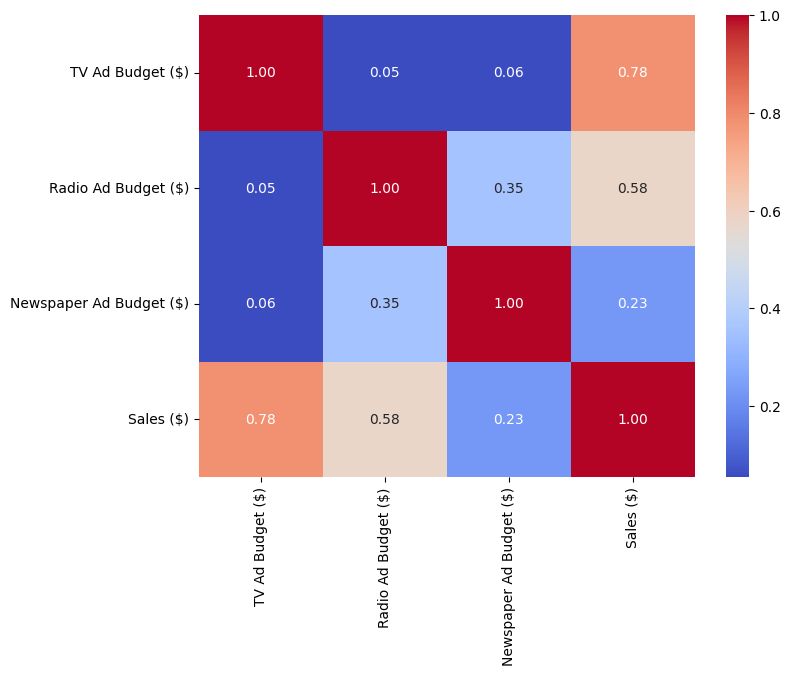

In [8]:
heatmap = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [9]:
# Take only TV ad budget as feature and sales as target due to high correlation
X = df['TV Ad Budget ($)']
y = df['Sales ($)']

In [10]:
X.head(n=10)

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
5      8.7
6     57.5
7    120.2
8      8.6
9    199.8
Name: TV Ad Budget ($), dtype: float64

In [11]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales ($), dtype: float64

In [ ]:
# Convert to numpy arrays for easier mathematical computations
y, X = y.values, X.values

In [ ]:
# Standardize the feature for better convergence and add intercept term
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X]

In [52]:
X[1:10]

array([[ 1.        , -1.19737623],
       [ 1.        , -1.51615499],
       [ 1.        ,  0.05204968],
       [ 1.        ,  0.3941822 ],
       [ 1.        , -1.61540845],
       [ 1.        , -1.04557682],
       [ 1.        , -0.31343659],
       [ 1.        , -1.61657614],
       [ 1.        ,  0.61604287]])

In [ ]:
# Use psuedo inverse as not every X.T @ X is invertible, pinv uses SVD which is more stable
w = np.linalg.pinv(X.T @ (X)) @ (X.T) @ (y)

In [53]:
y_pred = X @ w

In [17]:
e = y - y_pred
mse = np.mean(e**2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.512652915656757


In [18]:
print(X.shape)
print(y.shape)
print(y_pred.shape)

(200, 2)
(200,)
(200,)


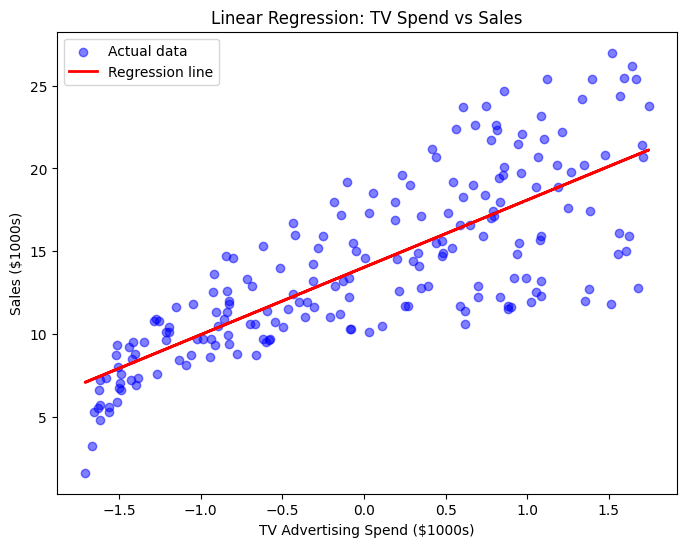

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, color="blue", alpha=0.5, label="Actual data")
plt.plot(X[:, 1], y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("TV Advertising Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Linear Regression: TV Spend vs Sales")
plt.legend()
plt.show()

In [20]:
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f"R² Score: {r2}")

R² Score: 0.611875050850071


# Regression With Gradient Descent

In [21]:
w_gd = 0.0
b_gd = 0.0
alpha = 0.1
epochs = 1000

In [22]:
m = len(X)
losses = []

In [ ]:
for i in range(epochs):
    y_pred_gd = w_gd * (X[:, 1]) + b_gd

    error = y_pred_gd - y

    dw = (2 / m) * (X[:, 1].T @ error)
    db = (2 / m) * np.sum(error)

    # Update parameters
    w_gd -= alpha * dw
    b_gd -= alpha * db

    # Compute and store loss (Mean Squared Error)
    mse = np.mean(error**2)
    losses.append(mse)

    # Print progress occasionally
    if i % 50 == 0:
        print(f"Epoch {i}: MSE = {mse:.4f}")

Epoch 0: MSE = 223.7163
Epoch 50: MSE = 10.5127
Epoch 100: MSE = 10.5127
Epoch 150: MSE = 10.5127
Epoch 200: MSE = 10.5127
Epoch 250: MSE = 10.5127
Epoch 300: MSE = 10.5127
Epoch 350: MSE = 10.5127
Epoch 400: MSE = 10.5127
Epoch 450: MSE = 10.5127
Epoch 500: MSE = 10.5127
Epoch 550: MSE = 10.5127
Epoch 600: MSE = 10.5127
Epoch 650: MSE = 10.5127
Epoch 700: MSE = 10.5127
Epoch 750: MSE = 10.5127
Epoch 800: MSE = 10.5127
Epoch 850: MSE = 10.5127
Epoch 900: MSE = 10.5127
Epoch 950: MSE = 10.5127


In [24]:
print("\nFinal parameters:")
print(f"w (slope): {w_gd}")
print(f"b (intercept): {b_gd}")


Final parameters:
w (slope): 4.071006120646741
b (intercept): 14.022499999999996


In [25]:
print("Gradient Descent Results:")
print(f"Slope (w): {w_gd}")
print(f"Intercept (b): {b_gd}")

print("\nNormal Equation Results:")
print(f"Slope (w): {w[1]}")
print(f"Intercept (b): {w[0]}")

Gradient Descent Results:
Slope (w): 4.071006120646741
Intercept (b): 14.022499999999996

Normal Equation Results:
Slope (w): 4.071006120646745
Intercept (b): 14.022500000000003


In [26]:
mse_gd = np.mean((y - (w_gd * X[:, 1] + b_gd)) ** 2)
mse_ne = np.mean((y - (w[0] + w[1] * X[:, 1])) ** 2)
print(mse_gd, mse_ne)

10.512652915656759 10.512652915656757


# Mini Batch Gradient Descent

In [27]:
# Code remains the same but with Mini Batch Gradient Descent we add one more hyperparameter - batch size and an extra loop

w_mbgd = 0.0
b_mbgd = 0.0
alpha = 0.01
epochs = 1000
batch_size = 16

m = len(X)
losses_mbgd = []

In [ ]:
for epoch in range(epochs):
    # Shuffle the data at the beginning of each epoch as Mini Batch GD relies on random sampling
    indices = np.arange(m)
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for start in range(0, m, batch_size):
        end = start + batch_size
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        y_pred_mbgd = w_mbgd * (X_batch[:, 1]) + b_mbgd

        error = y_pred_mbgd - y_batch

        dw = (2 / len(X_batch)) * (X_batch[:, 1].T @ error)
        db = (2 / len(X_batch)) * np.sum(error)

        # Update parameters
        w_mbgd -= alpha * dw
        b_mbgd -= alpha * db

        mse = np.mean(error**2)
        losses_mbgd.append(mse)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: MSE = {mse:.4f}")

print("\nFinal parameters (Mini Batch GD):")
print(f"w (slope): {w_mbgd}")
print(f"b (intercept): {b_mbgd}")
mse_mbgd = np.mean((y - (w_mbgd * X[:, 1] + b_mbgd)) ** 2)
print(mse_mbgd)

Epoch 0: MSE = 162.7829
Epoch 50: MSE = 5.4323
Epoch 100: MSE = 5.0951
Epoch 150: MSE = 12.7075
Epoch 200: MSE = 15.4965
Epoch 250: MSE = 1.8071
Epoch 300: MSE = 13.4629
Epoch 350: MSE = 7.2175
Epoch 400: MSE = 7.9042
Epoch 450: MSE = 8.4186
Epoch 500: MSE = 7.4315
Epoch 550: MSE = 14.4298
Epoch 600: MSE = 10.0678
Epoch 650: MSE = 5.8675
Epoch 700: MSE = 16.2793
Epoch 750: MSE = 10.0789
Epoch 800: MSE = 5.1231
Epoch 850: MSE = 9.1190
Epoch 900: MSE = 10.3741
Epoch 950: MSE = 16.6953

Final parameters (Mini Batch GD):
w (slope): 4.083592880008946
b (intercept): 14.020581159809538
10.512815024115675


# Stochastic Gradient Descent

In [34]:
w_sgd = 0.0
b_sgd = 0.0
alpha = 0.001
epochs = 250

m = len(X)
losses_sgd = []

In [49]:
# Stochastic Gradient Descent where we update parameters for single training example

for epoch in range(1, epochs + 1):
    # Shuffle the data at the beginning of each epoch
    indices = np.arange(m)
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for i in range(m):
        xi = X_shuffled[i].reshape(1, -1)
        yi = y_shuffled[i]

        y_pred_sgd = (w_sgd * (xi[:, 1]) + b_sgd)[0]

        error = y_pred_sgd - yi

        dw = (2 * xi[:, 1] * error)[0]
        db = 2 * error

        # Update parameters
        w_sgd -= alpha * dw
        b_sgd -= alpha * db

        mse = error**2
        losses_sgd.append(mse)

    if epoch % 25 == 0:
        print(f"Epoch {epoch}: MSE = {mse:.4f}")

print("\nFinal parameters (Stochastic GD):")
print(f"w (slope): {w_sgd}")
print(f"b (intercept): {b_sgd}")
mse_sgd = np.mean((y - (w_sgd * X[:, 1] + b_sgd)) ** 2)
print(mse_sgd)

Epoch 25: MSE = 1.2934
Epoch 50: MSE = 13.8178
Epoch 75: MSE = 11.8544
Epoch 100: MSE = 2.4334
Epoch 125: MSE = 5.3322
Epoch 150: MSE = 22.5348
Epoch 175: MSE = 1.0213
Epoch 200: MSE = 1.3802
Epoch 225: MSE = 0.5926
Epoch 250: MSE = 0.0217

Final parameters (Stochastic GD):
w (slope): [4.08324073]
b (intercept): [14.02868037]
10.512840798327634


In [56]:
print("\nNormal Equation Results:")
print(f"Slope (w): {w[1]}")
print(f"Intercept (b): {w[0]}\n")

print("Gradient Descent Results:")
print(f"Slope (w): {w_gd}")
print(f"Intercept (b): {b_gd}\n")

print("Mini Batch Gradient Descent Results:")
print(f"Slope (w): {w_mbgd}")
print(f"Intercept (b): {b_mbgd}\n")

print("Stochastic Gradient Descent Results:")
print(f"Slope (w): {w_sgd}")
print(f"Intercept (b): {b_sgd}\n")


Normal Equation Results:
Slope (w): 4.071006120646745
Intercept (b): 14.022500000000003

Gradient Descent Results:
Slope (w): 4.071006120646741
Intercept (b): 14.022499999999996

Mini Batch Gradient Descent Results:
Slope (w): 4.083592880008946
Intercept (b): 14.020581159809538

Stochastic Gradient Descent Results:
Slope (w): [4.08324073]
Intercept (b): [14.02868037]



##  Conclusion

It can be concluded that **Mini-Batch Gradient Descent (MBGD)** and **Stochastic Gradient Descent (SGD)** are generally more **efficient** and **practical** for real-world datasets.  
They tend to **converge to the minimum faster** in terms of computation time, as they update parameters incrementally instead of processing the entire dataset at once.

The **Closed-Form Solution (Normal Equation)** represents the *theoretical foundation* of linear regression — a direct mathematical approach.  
However, as datasets grow larger or become more complex (especially with many features or polynomial terms), computing the matrix inverse \((X^T X)^{-1}\) becomes:

-  **Computationally expensive**
-  **Numerically unstable or undefined** if \(X^T X\) is not invertible

Thus, while the closed-form solution beautifully demonstrates the origin of linear regression,  
**gradient-based methods like SGD and Mini-Batch GD** are preferred in practice for their **scalability**, **efficiency**, and **robustness**.


### Visualizing Gradient Descent Variants

The image below beautifully illustrates the difference between **Batch**, **Mini-Batch**, and **Stochastic Gradient Descent** optimization methods.  
Each method aims to reach the global minimum of the cost function, but the **path and efficiency** vary.

![Gradient Descent Visualisation](./img/Screenshot%202025-10-18%20121739.png)

#### 🟦 Batch Gradient Descent
- Uses the **entire dataset** to compute the gradient before each update.
- The path to the minimum is **smooth and direct**, as the gradient is exact.
- However, for large datasets, this method is **computationally expensive** and requires **large memory**, making it inefficient in practice.

#### 🟩 Mini-Batch Gradient Descent
- Divides the dataset into **small batches** (e.g., 32, 64 samples).
- Each batch updates the parameters once per iteration.
- The path is **less smooth**, but it balances **efficiency and stability**.
- This is the most commonly used approach in modern ML due to its **speed and scalability**.

#### 🟨 Stochastic Gradient Descent (SGD)
- Updates parameters **after each individual sample**.
- The path is **noisy and highly fluctuating**, but it often converges **faster in time** since updates happen more frequently.
- The randomness can help **escape local minima**, though convergence may oscillate around the global minimum.

---

In summary:
- **Batch GD** → Precise but slow  
- **Mini-Batch GD** → Fast, stable, and widely used  
- **Stochastic GD** → Fast but noisy  

> Each method trades off between **accuracy, speed, and computational cost**.